In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Ads_CTR_Optimisation.csv');
data

Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]

In [23]:
#step 1
n=700;  # total no of rounds=10000
ads=int(10);
Ni=np.zeros(ads,dtype=int);
Ri=np.zeros(ads,dtype=int);
ads_selected=[];
total_rewards=0;

#step 2
import math
for round in range(n):
    ad=0;
    maxUCB=0;
    for i in range(ads):
        if(Ni[i]>0):
            avgReward=(Ri[i]/Ni[i]);
            error=math.sqrt((3/2)*(math.log(round+1)/Ni[i]));
            LCB=avgReward-error
            UCB=avgReward+error
        else:
            UCB=1e400
            
        #step 3 
        if(UCB>maxUCB):
            maxUCB=UCB;
            ad=i;
            
    #step4 
    ads_selected.append(ad);
    Ni[ad]+=1
    feedback=data.values[round,ad]
    Ri[ad]+=feedback
    total_rewards+=feedback  
    

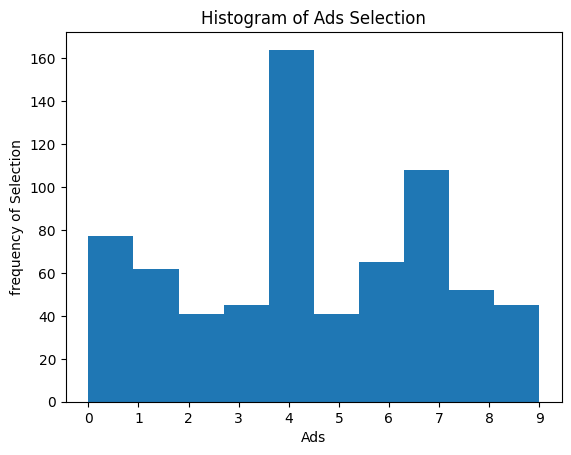

In [24]:
plt.title('Histogram of Ads Selection');
plt.xlabel('Ads');
plt.ylabel('frequency of Selection');
plt.xticks(np.arange(0,11));
plt.hist(ads_selected,bins=10);
plt.show();

#instead of 10,000 runs , UCB can find the ad with highest returns in about 700 runs